# Pytorch Workflow

### work flow
> prepare and load data

> build model

> Training fitting the model to data 

> making prediction and evaluating

> saving the model

In [138]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [139]:
import torch.nn as nn
# neural network

### Neural Network
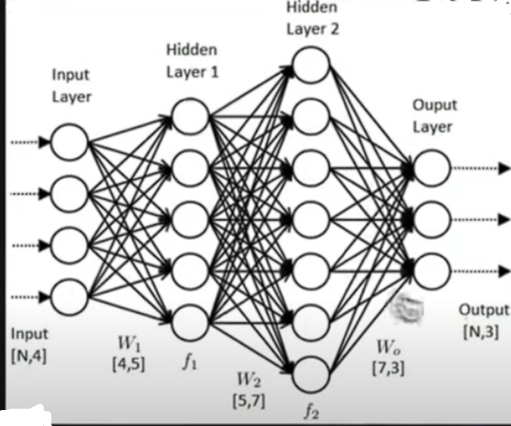

In [140]:
torch.__version__

'2.0.1+cpu'

### preparing and loading data

### linear regression
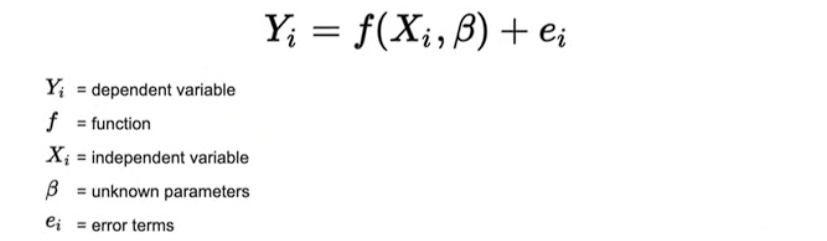

In [141]:
#parameters
weight =0.7
bias = 0.3

start=0
end=1
step=0.02
x= torch.arange(start,end,step).unsqueeze(dim=1) #i/p

y = weight * x +bias #o/p
x[:10],y[:10],len(x),len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

([<matplotlib.lines.Line2D at 0x1ea17cdbf40>],
 [<matplotlib.lines.Line2D at 0x1ea17cdb5e0>])

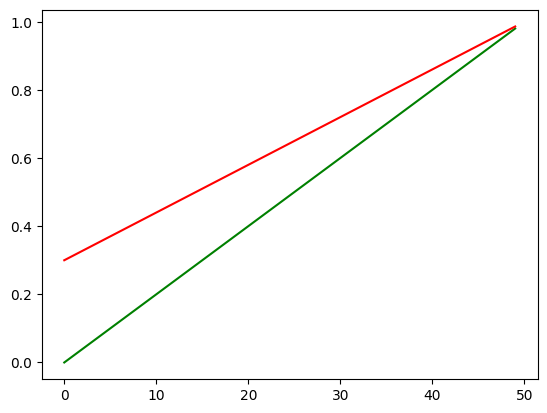

In [142]:
plt.plot(x,c='g'),plt.plot(y,c='r')

### Splitting data into training and testing

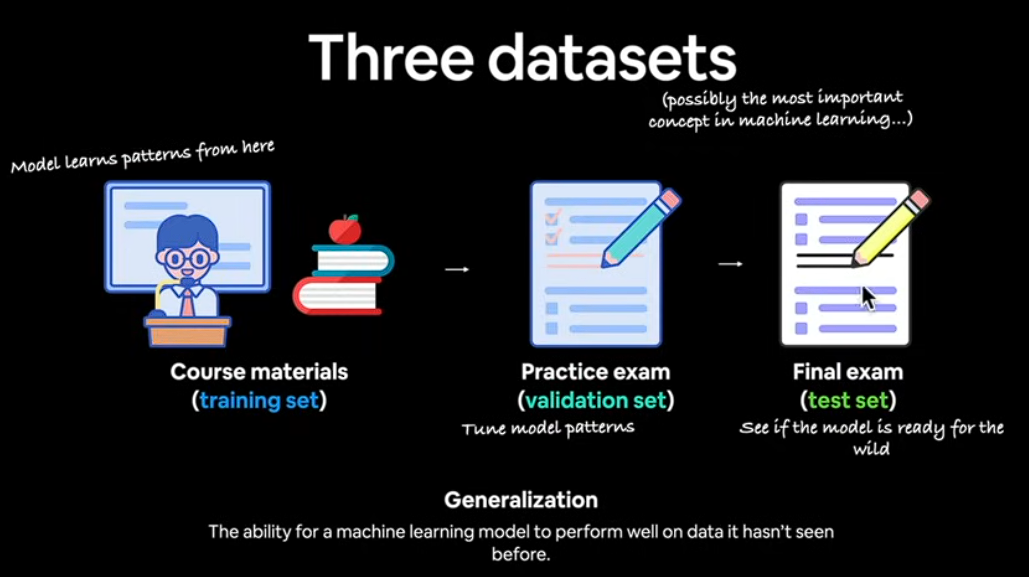

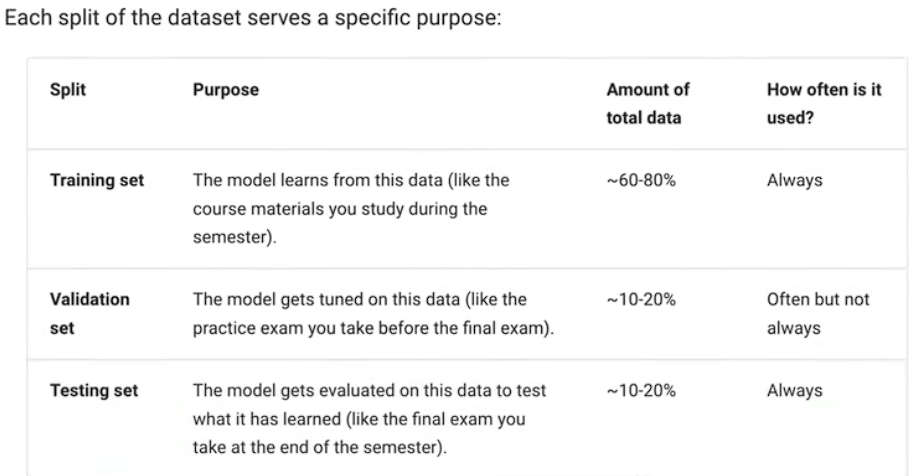

In [143]:
# creating training and testing data

# on x and y

train =int(0.8*len(x))
train

40

In [144]:
x_train,y_train =(x[:train],y[:train]) #  [:40]   
x_test,y_test = (x[train:],y[train:])  #  [40:]


len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [145]:
x_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

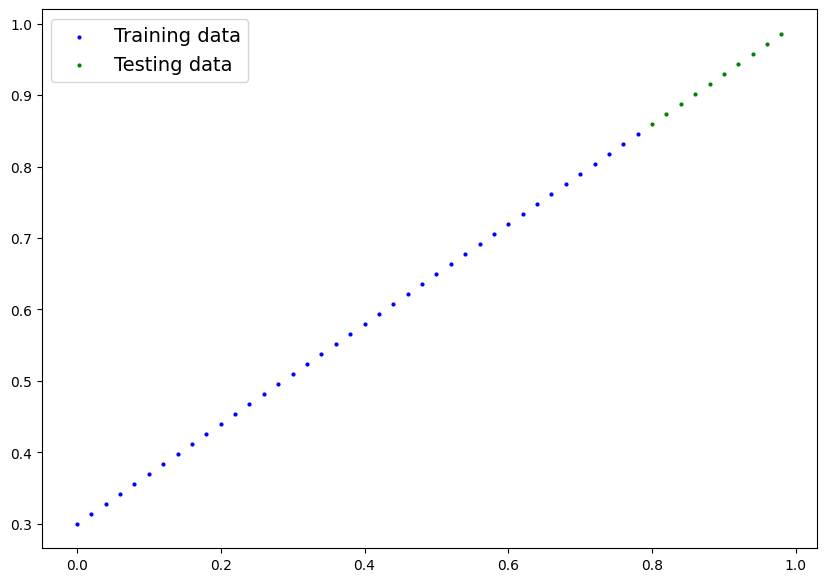

In [146]:
# visualizing


def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None) :
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
    
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=3,label='predictions')

    plt.legend(prop={"size":14}) # prop :properties
plot_prediction()

## Build model

In [147]:
# linear regression model
from torch import nn

class linearregressionmodel(nn.Module):  # class inherits on nn.module
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,         #stat with random numbers  an try to adjust to original one
                                              requires_grad=True, # aprameter to update via gradient descent
                                              dtype=torch.float
                                              ))
        
        self.bias=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# start with random numbers  look at data and fit into the same as (ideal data plot by adjusting weight and bias
# we have know n parameters weights and bias the pparameters 
# !in the model start from an ran dom number and tey to represent the w,b based on the data

# using gradient 
# back propagation

#grad = True its going to keep track of weights and bias throughout hre loop and update

In [149]:
model=linearregressionmodel()
model


linearregressionmodel()

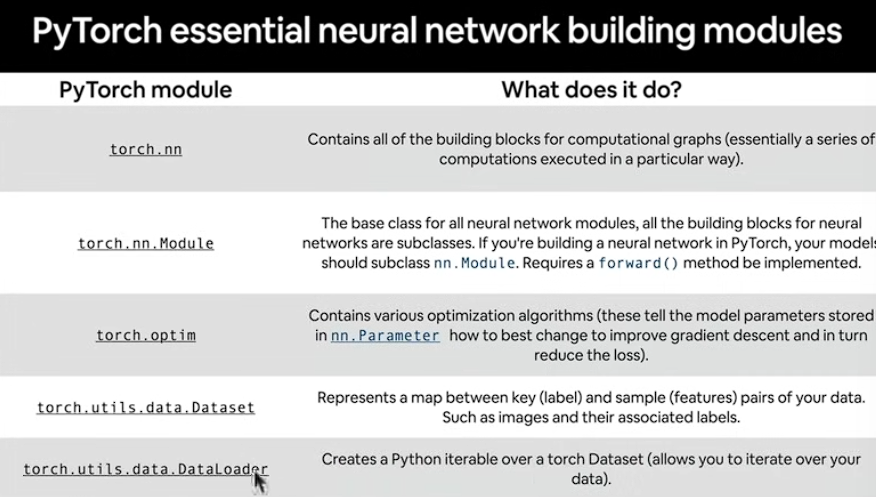

In [150]:

# nn.parameters >what parameters model to try and learn
# torch.optim > optimizer  > better fit train 


In [151]:
model.state_dict()

OrderedDict([('weight', tensor([-0.6995])), ('bias', tensor([-1.3023]))])

In [152]:
weight,bias

(0.7, 0.3)

In [153]:
# models prediction 
# predict y test based on x test
# making prediction using torch.inference_mode()
with torch.inference_mode():
    y_pred=model(x_test)

y_pred

tensor([[-1.8619],
        [-1.8759],
        [-1.8899],
        [-1.9039],
        [-1.9179],
        [-1.9319],
        [-1.9459],
        [-1.9599],
        [-1.9739],
        [-1.9878]])

In [154]:
# training model
# random parameters > ideal 

# loss function
# optimizer
model.parameters()

<generator object Module.parameters at 0x000001EA16701310>

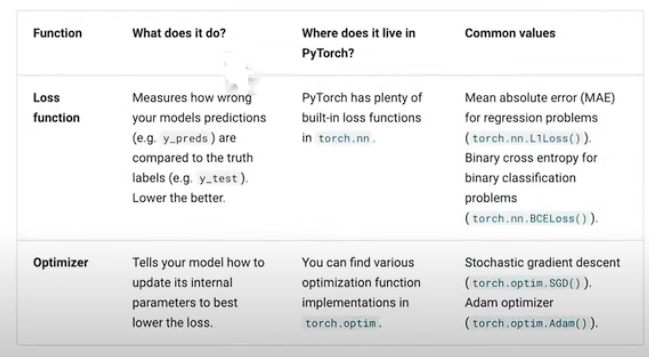

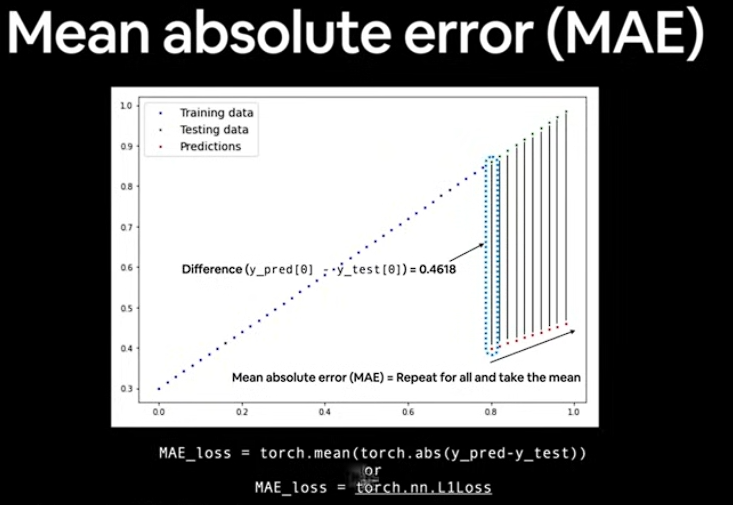

In [155]:

lossfunction=torch.nn.L1Loss() #MAE
optimizer =torch.optim.SGD(params = model.parameters(),lr=0.01)   #learning rate
# stochastic gradient descent  > optimizer to reduce loss
                           

# building a training ,testing loop  

> loop through the data 

> Forward pass data moving through forward method (data moving through the input to o/p layer) forward propagation

> calculate loss (compare forward pass prediction to ground truth ideal data)

> loss back ward (back propagation)

>optimizer (gradient descent)  gradient change in x ,y 

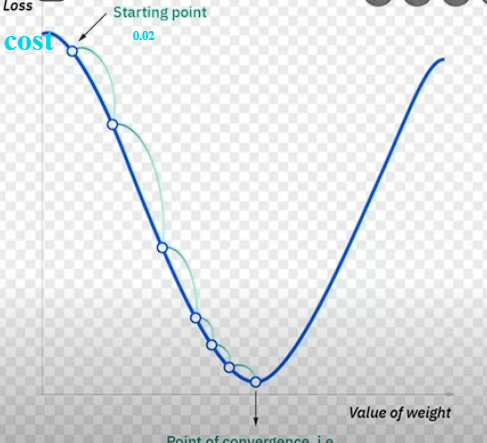

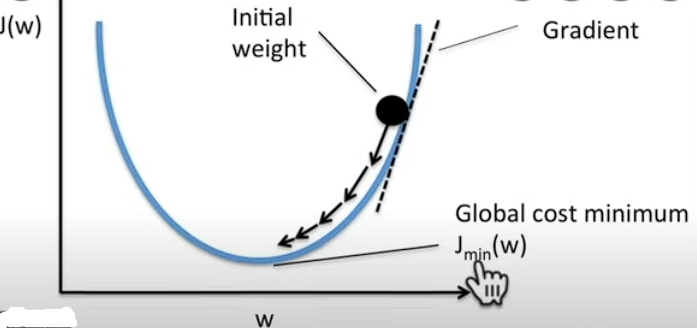

In [156]:
list(model.eval().parameters())

[Parameter containing:
 tensor([-0.6995], requires_grad=True),
 Parameter containing:
 tensor([-1.3023], requires_grad=True)]

In [157]:
list(model.eval().parameters())

[Parameter containing:
 tensor([-0.6995], requires_grad=True),
 Parameter containing:
 tensor([-1.3023], requires_grad=True)]

In [158]:
# epoch is one loop through the data through the model 
# pass the data through the model
torch.manual_seed(11)
epochs =500
# 1 loop through the data 
epochcount =[]
lossvalue=[]
testlossvalue=[]
for epoch in range(epochs):
    #  set to training mode
    model.train()

    # 2 forward pass
    y_pred =model(x_train)

    # 3 loss function
    loss=lossfunction(y_pred,y_train) #MAE  y_train :ideal values 
    
    #  4 optimizer zero grad  
    optimizer.zero_grad()

    # 5 performs back propagation based on model
    
    loss.backward()
    # step the optimizer (grae)
    optimizer.step()
# testing
    model.eval() # turns off different setting which are not needed fro testing like grad which was truned on while training
    with torch.inference_mode():
        # forward pass in testing
        test_pred =model(x_test)
        # calculate test loss
        test_loss = lossfunction(test_pred,y_test)

        

        
    if epochs % 10 == 0:
        epochcount.append(epoch)
        lossvalue.append(loss)
        testlossvalue.append(test_loss)
        print (f"epoch{epoch}| loss: {loss}| ")
        print(model.state_dict())
        print('\n',weight,bias)



epoch0| loss: 2.148118495941162| 
OrderedDict([('weight', tensor([-0.6956])), ('bias', tensor([-1.2923]))])

 0.7 0.3
epoch1| loss: 2.1365976333618164| 
OrderedDict([('weight', tensor([-0.6917])), ('bias', tensor([-1.2823]))])

 0.7 0.3
epoch2| loss: 2.1250767707824707| 
OrderedDict([('weight', tensor([-0.6878])), ('bias', tensor([-1.2723]))])

 0.7 0.3
epoch3| loss: 2.113555669784546| 
OrderedDict([('weight', tensor([-0.6839])), ('bias', tensor([-1.2623]))])

 0.7 0.3
epoch4| loss: 2.102034568786621| 
OrderedDict([('weight', tensor([-0.6800])), ('bias', tensor([-1.2523]))])

 0.7 0.3
epoch5| loss: 2.0905137062072754| 
OrderedDict([('weight', tensor([-0.6761])), ('bias', tensor([-1.2423]))])

 0.7 0.3
epoch6| loss: 2.0789926052093506| 
OrderedDict([('weight', tensor([-0.6722])), ('bias', tensor([-1.2323]))])

 0.7 0.3
epoch7| loss: 2.067471504211426| 
OrderedDict([('weight', tensor([-0.6683])), ('bias', tensor([-1.2223]))])

 0.7 0.3
epoch8| loss: 2.05595064163208| 
OrderedDict([('weig

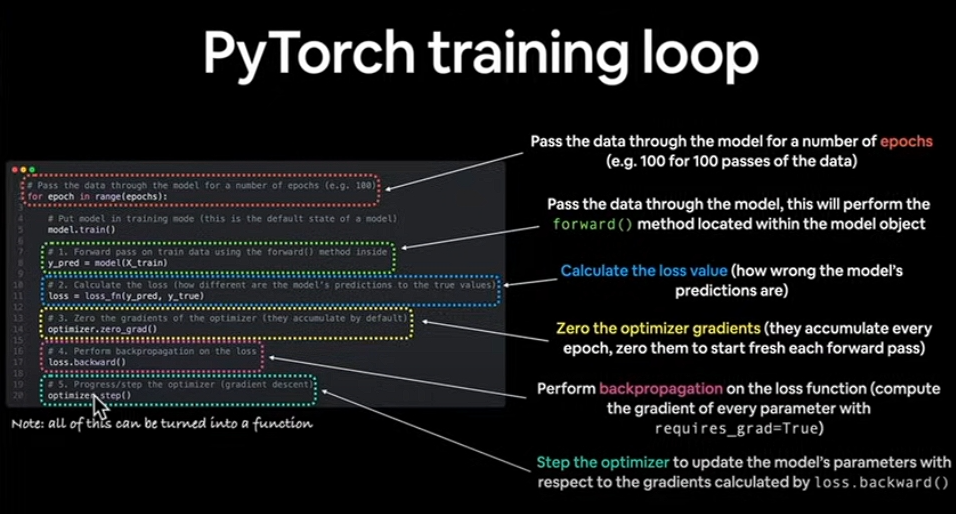
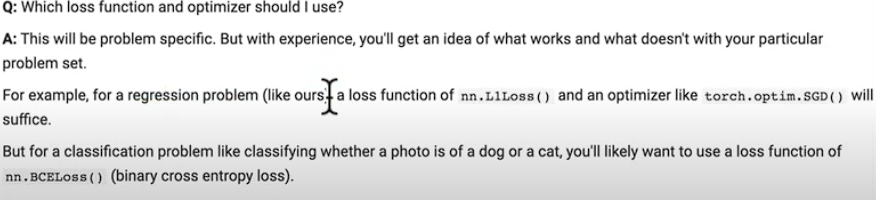

In [159]:
with torch.inference_mode(): #turns off grad 
        y_predd=model(x_test)
        #testlosss= loss(test_predd,y_test)
y_predd

tensor([[0.8197],
        [0.8316],
        [0.8435],
        [0.8554],
        [0.8672],
        [0.8791],
        [0.8910],
        [0.9029],
        [0.9147],
        [0.9266]])

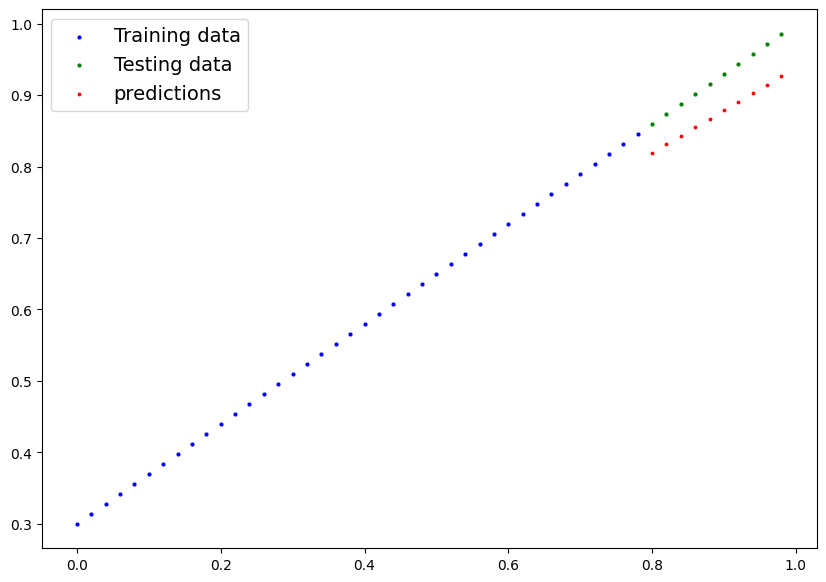

In [160]:
plot_prediction(predictions=y_predd)

In [161]:
e=model.state_dict()
e.items()
predweight ,predbias =e.values()

yy= predweight * x +predbias # the predicted y values 
yy[0:11]  # predicting y using predicted weight and bias

tensor([[0.3447],
        [0.3566],
        [0.3685],
        [0.3803],
        [0.3922],
        [0.4041],
        [0.4160],
        [0.4278],
        [0.4397],
        [0.4516],
        [0.4635]])

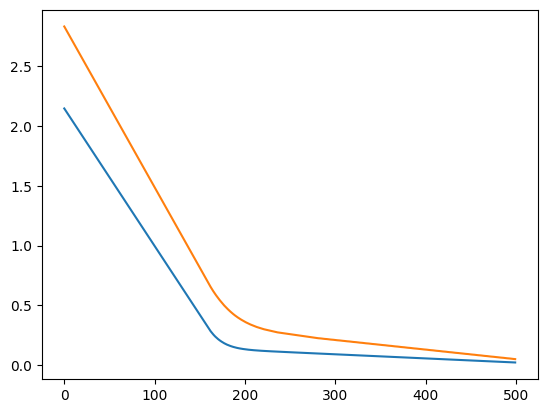

In [162]:
#plot loss curve
plt.plot(epochcount,np.array(torch.tensor(lossvalue).numpy()),label='trainloss')
#implement testloss
plt.plot(epochcount,np.array(torch.tensor(testlossvalue).numpy()),label='testloss')

plt.xlabel='epoch'

### saving the model ,loading

`torch.save()`  allows to save pytorch object as pickle format

`torch,load()` allows to load saved model

`torch.nn.Module_state_dict` allows to load saved state dictionary 

model.state_dict

In [163]:
# saving pytorch model

from pathlib import Path

# create model directory
modelpath = Path('model')
modelpath.mkdir(parents=True,exist_ok=True)

# model save path

modelname ='pytorch_linearregression.pth'

model_save_path =modelpath/modelname

# save model

print(model_save_path)

torch.save(obj=model.state_dict(),f=model_save_path)

model\pytorch_linearregression.pth


In [164]:
# loading model

# the state_dict is stored rether thn entire model

# load saved state_dict()  > instantiate a new instance of linear reg model

loaded_model=linearregressionmodel()

loaded_model.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [165]:
model.state_dict()

OrderedDict([('weight', tensor([0.5938])), ('bias', tensor([0.3447]))])

In [166]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.5938])), ('bias', tensor([0.3447]))])

In [167]:
loaded_model.eval()
with torch.inference_mode():
    loaded=loaded_model(x_test)
loaded

tensor([[0.8197],
        [0.8316],
        [0.8435],
        [0.8554],
        [0.8672],
        [0.8791],
        [0.8910],
        [0.9029],
        [0.9147],
        [0.9266]])

In [168]:
y_predd == loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])